In [231]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [232]:
import os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

os.getcwd()

'E:\\analytics_assignment'

In [233]:
os.chdir("E:\\analytics_assignment")

In [234]:
data=pd.read_pickle("final_data.pkl")

In [235]:
data.head()

,LIMIT_BAL_bin,LIMIT_BAL_bin_lbl,Age_bin_lbl,Age_bin,Age_bin2_lbl,Age_bin2,Edu,Avg_Use_bin,Avg_Use_bin_lbl,Avg_Use_bins2,Avg_Use_bins2_lbl,Tot_percpaid_lbl,Tot_percpaid_bin,Delay_bin,Default
0,"(9999.9, 50000.0]",L1,A1,"(20.9, 28.0]",A1,"(20.9, 30.0]",2,"(0.01785, 0.1343]",U2,"(-0.0001, 0.134]",UT1,P3,"(0.06092, 0.2108]",2_3,1
1,"(50000.0, 140000.0]",L2,A1,"(20.9, 28.0]",A1,"(20.9, 30.0]",2,"(0.01785, 0.1343]",U2,"(-0.0001, 0.134]",UT1,P4,"(0.2108, 0.808]",2_3,1
2,"(50000.0, 140000.0]",L2,A2,"(28.0, 34.0]",A2,"(30.0, 39.0]",2,"(0.1343, 0.4518]",U3,"(0.134, 0.452]",UT2,P3,"(0.06092, 0.2108]",0,0
3,"(9999.9, 50000.0]",L1,A3,"(34.0, 41.0]",A2,"(30.0, 39.0]",2,"(0.7582, 5.3643]",U5,"(0.758, 5.364]",UT4,P1,"(-0.0001, 0.03988]",0,0
4,"(9999.9, 50000.0]",L1,A4,"(41.0, 79.0]",A3,"(39.0, 79.0]",2,"(0.1343, 0.4518]",U3,"(0.134, 0.452]",UT2,P4,"(0.2108, 0.808]",0,0


In [236]:
df_WoeIV=pd.DataFrame(columns=[ 'bin', 'count', 'bad', 'good','% of bad', '% of good', 'WoE', 'IV', 'Var'])

## WOE and IV for LIMIT_BAL

In [237]:
def Get_WoeIV(bins,target):
    df=data[[bins,target]]
#     df.loc[:,bins]=df.loc[:,bins].astype(str)
    d=df.groupby(by=bins,as_index=False).agg({target:["count","sum"]})
    d.columns = ["bin", 'count', 'bad']
    d["good"]=d["count"]-d["bad"]
    d['% of bad'] = d['bad'] / d['bad'].sum()
    d['% of good'] = d['good'] / d['good'].sum()
    d['WoE'] = np.log(d['% of bad']/d['% of good'])
    d['IV'] = d['WoE'] * (d['% of bad'] - d['% of good'])
    d["Var"]=bins
    d.columns=['bin', 'count', 'bad', 'good','% of bad', '% of good', 'WoE', 'IV', 'Var']
    return(d)

In [238]:
target="Default"

In [239]:
data.columns

Index(['LIMIT_BAL_bin', 'LIMIT_BAL_bin_lbl', 'Age_bin_lbl', 'Age_bin',
       'Age_bin2_lbl', 'Age_bin2', 'Edu', 'Avg_Use_bin', 'Avg_Use_bin_lbl',
       'Avg_Use_bins2', 'Avg_Use_bins2_lbl', 'Tot_percpaid_lbl',
       'Tot_percpaid_bin', 'Delay_bin', 'Default'],
      dtype='object')

In [240]:
df_WoeIV=pd.concat([df_WoeIV,Get_WoeIV("LIMIT_BAL_bin",target)],axis=0)

In [241]:
df_WoeIV=pd.concat([df_WoeIV,Get_WoeIV("Age_bin",target)],axis=0)

In [242]:
df_WoeIV=pd.concat([df_WoeIV,Get_WoeIV("Age_bin2",target)],axis=0)

In [243]:
df_WoeIV=pd.concat([df_WoeIV,Get_WoeIV("Edu",target)],axis=0)

In [244]:
df_WoeIV=pd.concat([df_WoeIV,Get_WoeIV("Avg_Use_bin",target)],axis=0)

In [245]:
df_WoeIV=pd.concat([df_WoeIV,Get_WoeIV("Avg_Use_bins2",target)],axis=0)

In [246]:
df_WoeIV=pd.concat([df_WoeIV,Get_WoeIV("Tot_percpaid_bin",target)],axis=0)

In [247]:
df_WoeIV=pd.concat([df_WoeIV,Get_WoeIV("Delay_bin",target)],axis=0)

In [248]:
df_WoeIV.reset_index(drop=True,inplace=True)

In [249]:
df_WoeIV

,bin,count,bad,good,% of bad,% of good,WoE,IV,Var
0,"(140000.0, 240000.0]",7643,1326,6317,0.199819,0.270373,-0.302391,0.021335,LIMIT_BAL_bin
1,"(240000.0, 1000000.0]",7067,988,6079,0.148885,0.260187,-0.558226,0.062132,LIMIT_BAL_bin
2,"(50000.0, 140000.0]",7614,1882,5732,0.283605,0.245335,0.144958,0.005548,LIMIT_BAL_bin
3,"(9999.9, 50000.0]",7676,2440,5236,0.367691,0.224105,0.495127,0.071093,LIMIT_BAL_bin
4,"(20.9, 28.0]",8013,1884,6129,0.283906,0.262327,0.079053,0.001706,Age_bin
5,"(28.0, 34.0]",7683,1487,6196,0.224081,0.265194,-0.168456,0.006926,Age_bin
6,"(34.0, 41.0]",6854,1474,5380,0.222122,0.230269,-0.036022,0.000293,Age_bin
7,"(41.0, 79.0]",7450,1791,5659,0.269892,0.242210,0.108214,0.002995,Age_bin
8,"(20.9, 30.0]",11013,2471,8542,0.372363,0.365605,0.018315,0.000124,Age_bin2
9,"(30.0, 39.0]",9843,2002,7841,0.301688,0.335602,-0.106533,0.003613,Age_bin2


In [250]:
df_WoeIV[["IV","Var"]].groupby(by="Var",as_index=False).agg(sum).sort_values("IV",ascending=False)

,Var,IV
4,Delay_bin,0.842324
6,LIMIT_BAL_bin,0.160107
7,Tot_percpaid_bin,0.122931
2,Avg_Use_bin,0.116985
3,Avg_Use_bins2,0.087913
5,Edu,0.015683
0,Age_bin,0.011921
1,Age_bin2,0.006099


In [251]:
data_Woe=data[["Delay_bin","LIMIT_BAL_bin","Avg_Use_bin","Tot_percpaid_bin","Edu","Age_bin","Default"]].copy()

In [252]:
def Transform_data(data_Woe,target):
    for col in data_Woe.columns[data_Woe.columns!=target]:
        temp=df_WoeIV.loc[df_WoeIV.Var==col,["bin","WoE"]]
        data_Woe=data_Woe.merge(temp,how="left",left_on=col,right_on="bin")
        data_Woe.drop([col,"bin"],axis=1,inplace=True)
        data_Woe.rename(columns={"WoE":col},inplace=True)
    return data_Woe

In [253]:
data_final=Transform_data(data_Woe,target)

In [254]:
data_final.head()

,Default,Delay_bin,LIMIT_BAL_bin,Avg_Use_bin,Tot_percpaid_bin,Edu,Age_bin
0,1,0.990467,0.495127,-0.530547,0.063914,0.091416,0.079053
1,1,0.990467,0.144958,-0.530547,-0.454402,0.091416,0.079053
2,0,-0.761458,0.144958,-0.281556,0.063914,0.091416,-0.168456
3,0,-0.761458,0.495127,0.468678,0.355096,0.091416,-0.036022
4,0,-0.761458,0.495127,-0.281556,-0.454402,0.091416,0.108214


### Logistic Regression

In [255]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [256]:
X=data_final.loc[:,data_final.columns!=target]
y=data_final.loc[:,target]

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [258]:
logreg.coef_,logreg.intercept_

(array([[ 0.91088135,  0.3359032 ,  0.23690907,  0.36634451, -0.08892873,
          0.45194333]]), array([-1.24433111]))

In [259]:
X_test.to_csv("X_test.csv")
y_test.to_csv("y_test.csv")

### LR using statsmodels

In [260]:
import statsmodels.formula.api as sm

In [261]:
X_train.insert(0, 'intercept', 1)
X_test.insert(0, 'intercept', 1)

In [262]:
model = sm.Logit(endog=y_train,exog= X_train)

result = model.fit()

Optimization terminated successfully.
         Current function value: 0.454152
         Iterations 6


In [263]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20993
Method:                           MLE   Df Model:                            6
Date:                Thu, 19 Sep 2019   Pseudo R-squ.:                  0.1454
Time:                        23:08:40   Log-Likelihood:                -9537.2
converged:                       True   LL-Null:                       -11160.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -1.2449      0.018    -67.608      0.000      -1.281      -1.209
Delay_bin            0.9112      0.020     46.378      0.000       0.873       0.950
LIMIT_BAL_bin        0.3360      0.050      6.697      0.000       0.238       0.434
Avg_Use_bin          0.2370      0.060      3.957      0.000       0.120       0.354
Tot_percpaid_bin     0.3673      0.059      6.246      0.000       0.252       0.483
Edu                 -0.0929      0.152     -0.612      0.541      -0.391       0.205
Age_bin              0.4649      0.170      2.730      0.006       0.131       0.799
====================================================================================
"""

### Removing coeffcients having high P-value

In [264]:
X_train.drop(columns=["Edu"],inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [265]:
model = sm.Logit(endog=y_train,exog= X_train)

result = model.fit()

Optimization terminated successfully.
         Current function value: 0.454160
         Iterations 6


In [266]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Default   No. Observations:                21000
Model:                          Logit   Df Residuals:                    20994
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Sep 2019   Pseudo R-squ.:                  0.1454
Time:                        23:08:41   Log-Likelihood:                -9537.4
converged:                       True   LL-Null:                       -11160.
                                        LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -1.2448      0.018    -67.608      0.000      -1.281      -1.209
Delay_bin            0.9113      0.020     46.385      0.000       0.873       0.950
LIMIT_BAL_bin        0.3293      0.049      6.728      0.000       0.233       0.425
Avg_Use_bin          0.2363      0.060      3.946      0.000       0.119       0.354
Tot_percpaid_bin     0.3645      0.059      6.217      0.000       0.250       0.479
Age_bin              0.4585      0.170      2.697      0.007       0.125       0.792
====================================================================================
"""

In [267]:
prob=model.predict(result.params,X_train)

In [268]:
classes=pd.DataFrame(prob,columns=["class"])

In [269]:
classes["class"]=classes["class"].apply(lambda x: 1 if (x >0.5) else 0)

In [270]:
y_train.value_counts()

0    16304
1     4696
Name: Default, dtype: int64

In [271]:
print(metrics.confusion_matrix(y_train,classes))

[[15516   788]
 [ 3389  1307]]


In [272]:
15516+788

16304

In [273]:
metrics.accuracy_score(y_train,classes)

0.80109523809523808

In [274]:
print(metrics.classification_report(y_train, classes))

             precision    recall  f1-score   support

          0       0.82      0.95      0.88     16304
          1       0.62      0.28      0.38      4696

avg / total       0.78      0.80      0.77     21000



In [275]:
fpr, tpr, _ = metrics.roc_curve(y_train,  prob)

In [276]:
auc = metrics.roc_auc_score(y_train,  prob)

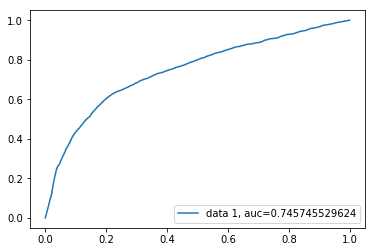

In [277]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## VIFs of all the variables

In [278]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [279]:
pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],index=X_train.columns)

intercept           1.048868
Delay_bin           1.108513
LIMIT_BAL_bin       1.177628
Avg_Use_bin         1.321687
Tot_percpaid_bin    1.284307
Age_bin             1.035430
dtype: float64

### Data for PREDICTIVE MODEL PERFORMANCE

In [280]:
classes["Prob"]=prob

In [281]:
Actuals=y_train

In [282]:
Actuals.reset_index(drop=True,inplace=True)

In [283]:
classes["Actuals"]=Actuals

In [284]:
classes

,class,Prob,Actuals
0,0,0.170728,0
1,0,0.374164,0
2,0,0.081089,0
3,0,0.167231,0
4,0,0.456924,1
5,0,0.084921,0
6,0,0.236742,0
7,0,0.130547,0
8,0,0.117708,0
9,0,0.237179,0


In [285]:
classes.to_pickle("data_model_vald.pkl")

### Make Predictions on Test Data

In [286]:
X_test.drop("Edu",axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [287]:
prob_test=model.predict(result.params,X_test)

In [288]:
prob_test

array([ 0.66738989,  0.36605581,  0.2523007 , ...,  0.13742952,
        0.08638155,  0.10516026])

In [289]:
y_test

8225     0
10794    0
9163     0
26591    0
6631     0
14161    1
252      1
2566     0
3478     0
2917     0
12775    0
29010    0
7983     0
21976    0
21139    0
12477    0
3199     1
9708     0
7631     0
6937     0
6175     0
16560    0
14733    1
19277    0
16290    1
19552    1
1482     0
24743    0
19704    0
4273     1
        ..
4504     0
16348    0
2610     0
2074     0
7342     0
25187    0
24853    0
23225    1
2280     0
20827    0
25691    1
5705     1
7553     0
12063    0
11607    0
22038    0
26598    1
14600    0
20945    0
1310     1
28352    0
23682    0
21383    0
675      1
21313    0
21914    0
17453    0
20344    0
1878     0
6465     0
Name: Default, Length: 9000, dtype: int64

In [290]:
Test_classes=pd.DataFrame(prob_test,columns=["class"])

In [291]:
Test_classes["class"]=Test_classes["class"].apply(lambda x: 1 if (x >0.5) else 0)

In [292]:
Test_classes["Prob"]=prob_test

In [293]:
Test_Actuals=y_test
Test_Actuals.reset_index(drop=True,inplace=True)

In [294]:
Test_classes["Actuals"]=Test_Actuals

In [299]:
Test_classes.to_pickle("Test_data_model_vald.pkl")